# Recording audio and processing to spectrogram

This notebook describes the following workflow:
<ol>
    
<li> Recond audio from the built-in microphone, create a .wav file
<li> Slice the .wav file into smaller bits
<li> Create spectrograms out of these bits

</ol>

## Loading dependencies

In [1]:
import os

#libraries for audio processing
from pydub import AudioSegment 
from pydub.utils import make_chunks
import pyaudio
import wave

#to play audio
import IPython.display as ipd

#Libraries for spectrograms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

## Capturing audio from soundcard

In [8]:
def record_audio(chunk, format, channels, rate, record_seconds, output_name):
  '''This function records audio from microphone
  Arguments to give: data chunk size (e.g. 1024), format (e.g. pyaudio.paInt16), channels(e.g. 2), sample rate (e.g. 44100), recording time in seconds, and file output name without extension
  The function returns an output audio file in .wav format.   
  '''
  CHUNK = chunk
  FORMAT = format
  CHANNELS = 2
  RATE = rate
  RECORD_SECONDS = record_seconds
  WAVE_OUTPUT_FILENAME = "output_name.wav"
  
  p = pyaudio.PyAudio()

  stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

  print("* recording")

  frames = []

  for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
      data = stream.read(CHUNK)
      frames.append(data)

  print("* done recording")

  stream.stop_stream()
  stream.close()
  p.terminate()

  wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
  wf.setnchannels(CHANNELS)
  wf.setsampwidth(p.get_sample_size(FORMAT))
  wf.setframerate(RATE)
  wf.writeframes(b''.join(frames))
  wf.close()

In [9]:
record_audio(1024, pyaudio.paInt16, 2, 44100, 10, "output.wav")

* recording
* done recording


In [5]:
def process_audio(file_name):
    '''takes .wav files in folder and creates 1min chunks. Returns the chunks inside a folder called chunked.'''
    myaudio = AudioSegment.from_file(file_name, "wav") 
    chunk_length_ms = 60000 # pydub calculates in millisec 
    chunks = make_chunks(myaudio,chunk_length_ms) #Make chunks of 1min, 
    for i, chunk in enumerate(chunks): 
        chunk_name = './chunked/' + file_name + "_{0}.wav".format(i) 
        print ("exporting", chunk_name) 
        chunk.export(chunk_name, format="wav") 

exporting ./chunked/output.wav_0.wav
exporting ./chunked/EE.wav_0.wav
exporting ./chunked/EE.wav_1.wav
exporting ./chunked/EE.wav_2.wav
exporting ./chunked/EE.wav_3.wav
exporting ./chunked/EE.wav_4.wav
exporting ./chunked/EE.wav_5.wav
exporting ./chunked/output_name.wav_0.wav


In [10]:
all_file_names = os.listdir()
try:
    os.makedirs('chunked') # creating a folder named chunked
except:
    pass
for each_file in all_file_names:
    if ('.wav' in each_file):
        process_audio(each_file)

exporting ./chunked/output.wav_0.wav
exporting ./chunked/EE.wav_0.wav
exporting ./chunked/EE.wav_1.wav
exporting ./chunked/EE.wav_2.wav
exporting ./chunked/EE.wav_3.wav
exporting ./chunked/EE.wav_4.wav
exporting ./chunked/EE.wav_5.wav
exporting ./chunked/output_name.wav_0.wav


## Creating Spectrograms

In [6]:
print(librosa.__version__)

0.8.1


In [11]:
# Listing .wav files inside the target folder
audio_fpath = "chunked/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  8


### Convensions

* Audio buffers are called y
* Sampling rate is called sr

"The STFT (Shot-time Fourier Transform) represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows” (Librosa Development Team, 2021).

The function to use is librosa.stft(). The function returns a complex matrix D.
D[f, t] is the FFT value at frequency f, at time (frame) t.

In [12]:
x, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(2646000,) 44100


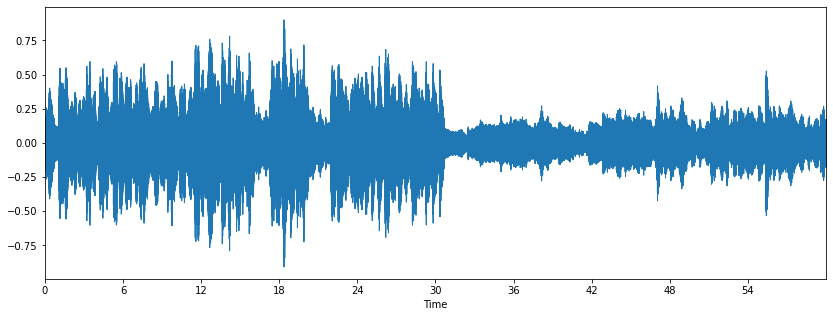

In [13]:
#Plotting one of the audio clips
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

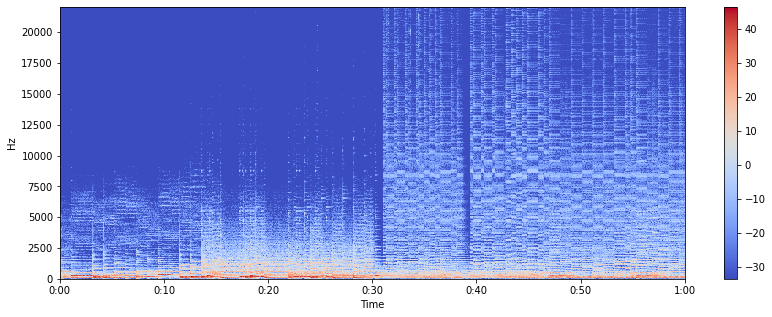

In [14]:
#Converting to Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Applying log transformation

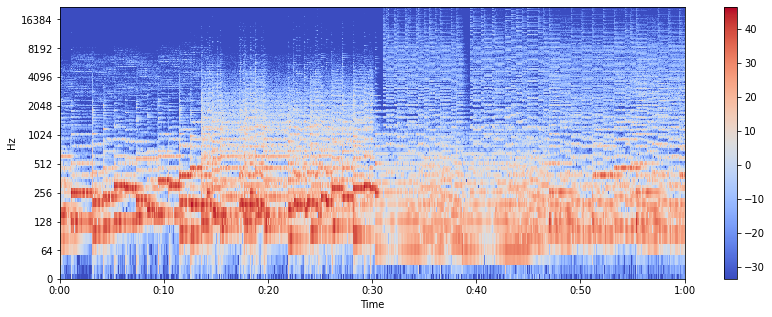

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()